In [1]:
# library
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gzip
import itertools
import random

In [2]:
!pip install biopython
from Bio import SeqIO

     |████████████████████████████████| 2.3 MB 5.2 MB/s 


In [3]:
# list to store strain names, accession numbers, and file names
strains = ['186','1D1609','1D1108','1D1460','15955','12D1','A6','CFBP5499','CFBP5877','CFBP6623','CFBP7129','CFBP6624','BIM B-1315G','FDAARGOS_1048','6N2']
accessions = ['GCF_002591665.3','GCF_002943835.1','GCF_003666425.1','GCF_003666445.1','GCF_003666465.1','GCF_003667905.1','GCF_003667925.1','GCF_005221325.1','GCF_005221345.1','GCF_005221385.1','GCF_005221405.1','GCF_005221425.1','GCF_014489975.1','GCF_016403145.1','GCF_017726655.1']
fasta_files = ['GCF_002591665.3_ASM259166v3_genomic.fna.gz','GCF_002943835.1_ASM294383v1_genomic.fna.gz','GCF_003666425.1_ASM366642v1_genomic.fna.gz','GCF_003666445.1_ASM366644v1_genomic.fna.gz','GCF_003666465.1_ASM366646v1_genomic.fna.gz','GCF_003667905.1_ASM366790v1_genomic.fna.gz','GCF_003667925.1_ASM366792v1_genomic.fna.gz','GCF_005221325.1_ASM522132v1_genomic.fna.gz','GCF_005221345.1_ASM522134v1_genomic.fna.gz','GCF_005221385.1_ASM522138v1_genomic.fna.gz','GCF_005221405.1_ASM522140v1_genomic.fna.gz','GCF_005221425.1_ASM522142v1_genomic.fna.gz','GCF_014489975.1_ASM1448997v1_genomic.fna.gz','GCF_016403145.1_ASM1640314v1_genomic.fna.gz','GCF_017726655.1_ASM1772665v1_genomic.fna.gz']

In [4]:
# dictionary to store all seqs as str
dict_genomes = {}
for i in range(len(strains)):
    acc_id = strains[i]
    file_name = fasta_files[i]
    with gzip.open(file_name, "rt") as handle:
        records = list(SeqIO.parse(handle, "fasta"))
        dict_genomes[acc_id] = []
        for record in records:
            dict_genomes[acc_id].append(str(record.seq.upper()))

In [ ]:
for accession in dict_genomes.keys():
    for seq_str in dict_genomes[accession]:
        print(accession, len(seq_str))

## Function: get_kmer_mt
The multidimensional method

In [5]:
def get_kmer_mt(seq_str, k=12, kmer_mt=np.zeros(shape=[4]*12)):
    seq_str = seq_str.replace('A', '0')
    seq_str = seq_str.replace('T', '1')
    seq_str = seq_str.replace('C', '2')
    seq_str = seq_str.replace('G', '3')
    i = 0
    while i+k <= len(seq_str):
        kmer_h = seq_str[i:i+k]
        coord = tuple([int(n) for n in kmer_h])
        kmer_mt[coord]+=1
        i+=1
    return kmer_mt

In [ ]:
k=12
genome = '15955'

kmer_mt = np.zeros(shape=[4]*k)
seq_str = dict_genomes[genome][3]
kmer_mt = get_kmer_mt(seq_str, k=k, kmer_mt=kmer_mt)

data = {'coord':list(itertools.product([0,1,2,3], repeat=k)), 'count':kmer_mt.flatten()}
kmer_tab = pd.DataFrame(data)
kmer_tab = kmer_tab.sort_values('count', ignore_index=True, ascending=False)
kmer_tab

,coord,count
0,"(2, 3, 3, 0, 2, 3, 2, 1, 3, 1, 1, 3)",4.0
1,"(3, 3, 2, 0, 3, 3, 0, 1, 0, 1, 0, 1)",4.0
2,"(3, 3, 2, 1, 3, 2, 2, 3, 0, 2, 0, 1)",3.0
3,"(2, 3, 0, 1, 2, 3, 0, 3, 0, 1, 2, 3)",3.0
4,"(1, 1, 3, 0, 2, 3, 2, 3, 3, 0, 2, 3)",3.0
...,...,...
16777211,"(1, 1, 1, 1, 2, 2, 3, 0, 2, 0, 0, 1)",0.0
16777212,"(1, 1, 1, 1, 2, 2, 3, 0, 2, 0, 0, 2)",0.0
16777213,"(1, 1, 1, 1, 2, 2, 3, 0, 2, 0, 0, 3)",0.0
16777214,"(1, 1, 1, 1, 2, 2, 3, 0, 2, 0, 1, 0)",0.0


In [ ]:
#''.join([str(value) for value in ])
test_table = kmer_tab.loc[kmer_tab.index<20,'coord']
''.join([str(value) for value in test_table])

'(2, 3, 3, 0, 2, 3, 2, 1, 3, 1, 1, 3)(3, 3, 2, 0, 3, 3, 0, 1, 0, 1, 0, 1)(3, 3, 2, 1, 3, 2, 2, 3, 0, 2, 0, 1)(2, 3, 0, 1, 2, 3, 0, 3, 0, 1, 2, 3)(1, 1, 3, 0, 2, 3, 2, 3, 3, 0, 2, 3)(2, 2, 3, 2, 2, 3, 3, 0, 1, 3, 3, 2)(3, 3, 2, 3, 0, 1, 1, 1, 3, 1, 1, 2)(3, 1, 3, 2, 1, 1, 3, 0, 3, 2, 1, 2)(2, 0, 3, 0, 1, 2, 2, 0, 3, 0, 1, 2)(2, 3, 3, 2, 3, 2, 1, 3, 1, 2, 3, 2)(2, 0, 0, 0, 2, 0, 3, 2, 3, 2, 1, 3)(1, 2, 3, 0, 1, 0, 0, 2, 3, 2, 2, 3)(2, 3, 3, 1, 2, 3, 0, 3, 0, 1, 3, 0)(3, 3, 1, 3, 0, 0, 3, 3, 2, 2, 0, 2)(2, 3, 2, 2, 1, 1, 3, 1, 1, 2, 1, 2)(1, 2, 2, 3, 3, 0, 0, 0, 3, 2, 1, 3)(3, 2, 2, 1, 1, 2, 2, 3, 2, 3, 2, 3)(3, 2, 3, 2, 0, 1, 2, 0, 3, 2, 3, 2)(3, 2, 0, 3, 0, 1, 2, 2, 0, 3, 0, 1)(2, 1, 1, 3, 0, 3, 2, 0, 0, 1, 0, 1)'

In [ ]:
#arr_count = kmer_tab['count'].unique()
counts = kmer_tab['count'].unique()
counts = counts[counts>1]
#del arr_count[-2:]
#arr_count
counts

array([4., 3., 2.])

In [ ]:
df_h = kmer_tab[kmer_tab['count']==3]
df_h.index

Int64Index([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
            36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
           dtype='int64')

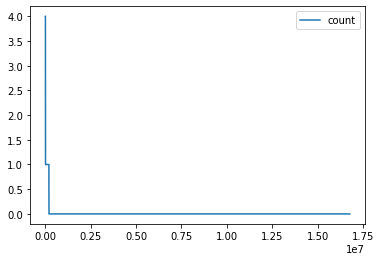

In [ ]:
kmer_tab.plot().get_figure().savefig('name')

In [ ]:
## Writing the Fasta File for SHUFFELED Sequence
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

counts = kmer_tab['count'].unique().tolist()
del counts[-2:]

for count in counts:
    df_h = kmer_tab[kmer_tab['count']==count]
    out_filename = 'kmers_' + count + '.fasta'
    with open("out_filename", "w") as output_handle:
        for i in list(df_h.index):
            coord_h = df_h[i, 'coord']
            kmer_h = ''.join([str(value) for value in kmer_tab.iloc[0,0]])
            kmer_h = kmer_h.replace('0', 'A')
            kmer_h = kmer_h.replace('1', 'T')
            kmer_h = kmer_h.replace('2', 'C')
            kmer_h = kmer_h.replace('3', 'G')

            seqrecord = SeqRecord(Seq(kmer_h), str(i), '', '')
            SeqIO.write(seqrecord, output_handle, "fasta")

In [ ]:
k=12
genome = '15955'

kmer_mt = np.zeros(shape=[4]*k)
seq_str = dict_genomes[genome][0]
kmer_mt = get_kmer_mt(seq_str, k=k, kmer_mt=kmer_mt)

for contig in range(1, len(dict_genomes[genome])):
    seq_str = dict_genomes[genome][contig]
    kmer_mt = get_kmer_mt(seq_str, k=k, kmer_mt=kmer_mt)

# convert multidimensional matrix to sorted kmer table
data = {'coord':list(itertools.product([0,1,2,3], repeat=k)), 'count':kmer_mt.flatten()}
kmer_tab = pd.DataFrame(data)
kmer_tab = kmer_tab.sort_values('count', ignore_index=True, ascending=False)
kmer_tab

,coord,count
0,"(2, 3, 2, 2, 3)",25296.0
1,"(2, 3, 3, 2, 3)",24581.0
2,"(3, 2, 2, 3, 2)",23519.0
3,"(3, 2, 3, 3, 2)",22597.0
4,"(2, 3, 3, 2, 0)",22056.0
...,...,...
1019,"(1, 1, 0, 3, 1)",428.0
1020,"(1, 0, 2, 1, 0)",411.0
1021,"(0, 2, 1, 0, 3)",378.0
1022,"(1, 0, 3, 1, 0)",356.0


In [ ]:
kmer_tab.head(300000)

,coord,count
0,"(2, 2, 3, 2, 2, 3, 3, 0, 0, 0, 3, 2)",33.0
1,"(3, 2, 2, 3, 2, 2, 3, 3, 0, 0, 0, 3)",32.0
2,"(1, 2, 3, 3, 2, 2, 1, 1, 3, 2, 2, 3)",32.0
3,"(3, 2, 1, 1, 1, 2, 2, 3, 3, 2, 3, 3)",31.0
4,"(3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2)",30.0
...,...,...
299995,"(0, 3, 2, 2, 2, 2, 3, 2, 2, 1, 2, 3)",3.0
299996,"(0, 1, 3, 0, 0, 0, 0, 1, 2, 3, 3, 2)",3.0
299997,"(2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 0, 2)",3.0
299998,"(1, 2, 2, 3, 3, 2, 3, 2, 1, 1, 2, 0)",3.0


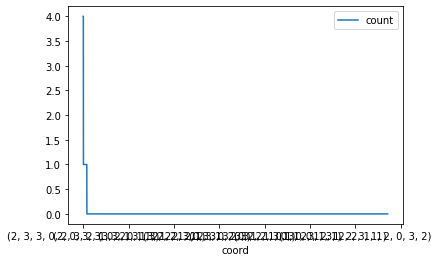

In [ ]:
#kmer_tab1 = kmer_tab.head(100)
kmer_tab.plot(x='coord', y='count')

#### check function: get_kmer_mt

In [ ]:
kmer_h = ''.join([str(value) for value in kmer_tab.iloc[0,0]])
kmer_h = kmer_h.replace('0', 'A')
kmer_h = kmer_h.replace('1', 'T')
kmer_h = kmer_h.replace('2', 'C')
kmer_h = kmer_h.replace('3', 'G')
kmer_h

'GCCGCCGCCG'

In [ ]:
with gzip.open(fasta_files[4], "rt") as handle:
    records = list(SeqIO.parse(handle, "fasta"))
    for record in records:
        seq_h = record.seq.upper()
        print(seq_h.count_overlap(kmer_h))

111
77
22
2


## Function: get_kmer_tab
The hash algorithm

In [ ]:
def get_kmer_tab(seq_str, k=12):
    kmer_table = pd.DataFrame(columns = ['kmer','count'])
    i = 0
    while i+k <= len(seq_str):
        kmer_h = seq_str[i:i+k]
        if kmer_h in kmer_table['kmer'].tolist():
            kmer_table.loc[kmer_table['kmer']==kmer_h, 'count'] += 1
        else:
            kmer_table.loc[len(kmer_table.index)] = [kmer_h, 1]
        i+=1
    table.sort_values('count')
    return kmer_table

In [ ]:
seq_str = dict_genomes['186'][3]

In [ ]:
table = get_kmer_tab(seq_str, k=12)

In [ ]:
table

,kmer,count
0,TGTATCGATATC,1
1,GTATCGATATCG,1
2,TATCGATATCGT,1
3,ATCGATATCGTA,1
4,TCGATATCGTAT,1
...,...,...
64,ATCCGATATTGA,1
65,TCCGATATTGAC,1
66,CCGATATTGACT,1
67,CGATATTGACTA,1


## permutation

In [6]:
k=12
genome = '15955'

kmer_mt_init_o = np.zeros(shape=[4]*k)
kmer_mt_init_e = np.zeros(shape=[4]*k)

# observed
seq_str = dict_genomes[genome][0]
kmer_mt_o = get_kmer_mt(seq_str, k=k, kmer_mt=kmer_mt_init_o)

# expected (permute 10)
permuted_seq = list(seq_str)
random.shuffle(permuted_seq)
permuted_seq = ''.join(permuted_seq)
kmer_mt_e = get_kmer_mt(permuted_seq, k=k, kmer_mt=kmer_mt_init_e)
for i in range(9):
    permuted_seq = list(seq_str)
    random.shuffle(permuted_seq)
    permuted_seq = ''.join(permuted_seq)
    kmer_mt_e = get_kmer_mt(permuted_seq, k=k, kmer_mt=kmer_mt_e)
    

# loop through all contigs
for contig in range(1, len(dict_genomes[genome])):
    # observed
    seq_str = dict_genomes[genome][contig]
    kmer_mt_o = get_kmer_mt(seq_str, k=k, kmer_mt=kmer_mt_o)
    
    # expected
    for i in range(10):
        permuted_seq = list(seq_str)
        random.shuffle(permuted_seq)
        permuted_seq = ''.join(permuted_seq)
        kmer_mt_e = get_kmer_mt(permuted_seq, k=k, kmer_mt=kmer_mt_e)

# mean for 10 permutation
kmer_mt_e = kmer_mt_e/10


# convert multidimensional matrix to sorted kmer table
data = {'coord':list(itertools.product([0,1,2,3], repeat=k)), 'observed':kmer_mt_o.flatten(), 'expected':kmer_mt_e.flatten()}
kmer_tab = pd.DataFrame(data)
kmer_tab['corrected'] = kmer_tab['observed'] - kmer_tab['expected']
kmer_tab = kmer_tab.sort_values('observed', ignore_index=True, ascending=False)
kmer_tab

KeyboardInterrupt: ignored

In [ ]:
kmer_tab1 = kmer_tab[kmer_tab['observed']>10]
kmer_tab1 = kmer_tab1[['corrected', 'observed', 'expected']]
kmer_tab1.plot(figsize=(8,10)).scatter.get_figure().savefig('name')

KeyError: ignored

In [7]:
k=12
genome = '15955'

kmer_mt_init_o = np.zeros(shape=[4]*k)
kmer_mt_init_e = np.zeros(shape=[4]*k)


# observed
seq_str = dict_genomes[genome][3]
kmer_mt_o = get_kmer_mt(seq_str, k=k, kmer_mt=kmer_mt_init_o)

# expected
permuted_seq = list(seq_str)
random.shuffle(permuted_seq)
permuted_seq = ''.join(permuted_seq)
kmer_mt_e = get_kmer_mt(permuted_seq, k=k, kmer_mt=kmer_mt_init_e)

# convert multidimensional matrix to sorted kmer table
data = {'coord':list(itertools.product([0,1,2,3], repeat=k)), 'observed':kmer_mt_o.flatten(), 'expected':kmer_mt_e.flatten()}
kmer_tab = pd.DataFrame(data)
kmer_tab['corrected']=kmer_tab['observed'] - kmer_tab['expected']
kmer_tab = kmer_tab.sort_values('observed', ignore_index=True, ascending=False)
kmer_tab

,coord,observed,expected,corrected
0,"(2, 3, 3, 0, 2, 3, 2, 1, 3, 1, 1, 3)",4.0,0.0,4.0
1,"(3, 3, 2, 0, 3, 3, 0, 1, 0, 1, 0, 1)",4.0,0.0,4.0
2,"(3, 3, 2, 1, 3, 2, 2, 3, 0, 2, 0, 1)",3.0,0.0,3.0
3,"(2, 3, 0, 1, 2, 3, 0, 3, 0, 1, 2, 3)",3.0,0.0,3.0
4,"(1, 1, 3, 0, 2, 3, 2, 3, 3, 0, 2, 3)",3.0,0.0,3.0
...,...,...,...,...
16777211,"(1, 1, 1, 1, 2, 2, 3, 0, 2, 0, 0, 1)",0.0,0.0,0.0
16777212,"(1, 1, 1, 1, 2, 2, 3, 0, 2, 0, 0, 2)",0.0,0.0,0.0
16777213,"(1, 1, 1, 1, 2, 2, 3, 0, 2, 0, 0, 3)",0.0,0.0,0.0
16777214,"(1, 1, 1, 1, 2, 2, 3, 0, 2, 0, 1, 0)",0.0,0.0,0.0


In [18]:
kmer_tab1

,observed,expected,corrected
0,4.0,0.0,4.0
1,4.0,0.0,4.0
2,3.0,0.0,3.0
3,3.0,0.0,3.0
4,3.0,0.0,3.0
...,...,...,...
2993,2.0,0.0,2.0
2994,2.0,0.0,2.0
2995,2.0,0.0,2.0
2996,2.0,0.0,2.0


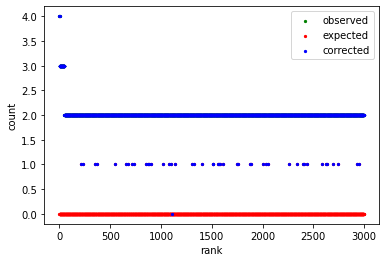

In [38]:
kmer_tab1 = kmer_tab[kmer_tab['observed']>1]
kmer_tab1 = kmer_tab1[['observed', 'expected','corrected']]
kmer_tab1['x'] = kmer_tab1.index
ax1 = kmer_tab1.plot(kind='scatter', x='x', y='observed', color='g', s=5, label='observed')    
ax2 = kmer_tab1.plot(kind='scatter', x='x', y='expected', color='r', s=5, ax=ax1, label='expected')    
ax3 = kmer_tab1.plot(kind='scatter', x='x', y='corrected', color='b', s=5, ax=ax1, label='corrected')
plt.xlabel('rank')
plt.ylabel('count')
plt.savefig('books_read.png')

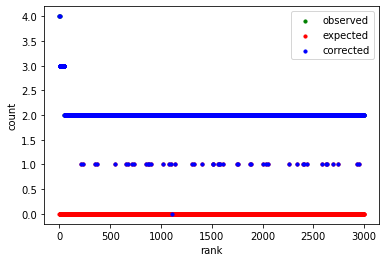

In [41]:
kmer_tab1 = kmer_tab[kmer_tab['observed']>1]
kmer_tab1 = kmer_tab1[['observed', 'expected','corrected']]
kmer_tab1['x'] = kmer_tab1.index
ax1 = kmer_tab1.plot(kind='scatter', x='x', y='observed', color='g', s=10, label='observed')    
ax2 = kmer_tab1.plot(kind='scatter', x='x', y='expected', color='r', s=10, ax=ax1, label='expected')    
ax3 = kmer_tab1.plot(kind='scatter', x='x', y='corrected', color='b', s=10, ax=ax1, label='corrected')
plt.xlabel('rank')
plt.ylabel('count')
plt.savefig('books_read.png')